In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split #pre-procesamiento de datos

In [22]:
pd.set_option('display.max_columns', None)

In [23]:
publications = pd.read_excel("Publications17-21.xlsx", na_values = "-")

In [24]:
publications.head(3)

,Number of Authors,Scopus Author Ids,Year,Full date,Scopus Source title,Volume,Issue,Pages,Article number,ISSN,Source ID,Source type,SNIP (publication year),SNIP percentile (publication year) *,CiteScore (publication year),CiteScore percentile (publication year) *,SJR (publication year),SJR percentile (publication year) *,Field-Weighted View Impact,Views,Citations,Field-Weighted Citation Impact,Field-Citation Average,"Outputs in Top Citation Percentiles, per percentile","Field-Weighted Outputs in Top Citation Percentiles, per percentile",Patent citations,Publication type,Open Access,PubMed ID,Number of Institutions,Scopus Author ID First Author,Scopus Author ID Last Author,Scopus Author ID Corresponding Author,Scopus Author ID Single Author,Country/Region,All Science Journal Classification (ASJC) code,All Science Journal Classification (ASJC) field name,Quacquarelli Symonds (QS) Subject area code,Quacquarelli Symonds (QS) Subject area field name,Quacquarelli Symonds (QS) Subject code,Quacquarelli Symonds (QS) Subject field name,Time Higher Education (THE) code,Time Higher Education (THE) field name,Sustainable Development Goals (2022),Topic Cluster name,Topic Cluster number,Topic name,Topic number,Topic Cluster Prominence Percentile,Topic Prominence Percentile
0,3,55391699600| 57195591068| 57195530606,2017,2017-08-15,Applied Energy,200,NaN,141-154,NaN,ISSN-03062619,28801.0,Journal,2.80,3.0,12.9,1.0,3.162,1.0,1.42,68,386,16.56,11.23,1,1,0,Article,NaN,NaN,5,5.539170e+10,5.719553e+10,55391699600,NaN,China| Mexico| Egypt,2100| 2210| 2215| 2308,General Energy| Mechanical Engineering| Buildi...,3| 2,Social Sciences & Management| Engineering & Te...,424| 106| 222| 249| 220| 219,Environmental Sciences| Architecture| Engineer...,37| 36,Physical Sciences| Engineering and Technology,SDG 7,"Electric Potential,Electric Inverters,DC-DC Co...",13.0,"Solar Cell,Photovoltaic Cells,Parameter Extrac...",4607.0,98.194,99.021
1,3,57192253056| 6701780106| 35320015600,2017,2017-03-01,Molecules,22,3,NaN,358,ISSN-14203049,26370.0,Journal,1.20,20.0,4.5,15.0,0.855,19.0,2.39,124,281,5.93,24.09,1,2,0,Review,Gold|Green,28245635.0,2,5.719225e+10,3.532002e+10,35320015600,NaN,Mexico| United States,1313| 1601| 1602| 1605| 1606| 3002| 3003,Molecular Medicine| Chemistry (miscellaneous)|...,4| 5,Natural Sciences| Life Sciences & Medicine,532| 249| 409| 537,Medicine| Engineering - Petroleum| Chemistry| ...,32| 37| 34,"Life Sciences| Physical Sciences| Clinical, pr...",NaN,"Coffee,Caffeine,Energy Drinks",1192.0,"Chlorogenic Acid,Cafestol,Coffee",5887.0,64.415,97.268
2,8,35241843100| 57194428895| 57194423859| 3660876...,2017,2017-09-01,Biomaterials,139,NaN,229-243,NaN,ISSN-01429612,28200.0,Journal,1.92,6.0,18.0,2.0,3.111,2.0,6.87,221,279,12.71,12.03,1,1,1,Article,Green,28579065.0,5,3.524184e+10,7.402248e+09,35241843100,NaN,Mexico| United States| Australia,1304| 1502| 2211| 2502| 2503,Biophysics| Bioengineering| Mechanics of Mater...,5| 2| 4,Life Sciences & Medicine| Engineering & Techno...,222| 218| 507| 433,"Engineering - Mechanical, Aeronautical & Manuf...",32| 36,Life Sciences| Engineering and Technology,NaN,"Cells,Neoplasms,Hydrogels",166.0,"Scaffold,Polyethylene Glycol Dimethacrylate Hy...",3938.0,96.856,99.859


In [25]:
columns_to_keep = ['Number of Authors', 'Scopus Author Ids', 'Full date',
       'SNIP (publication year)',
       'SNIP percentile (publication year) *', 'CiteScore (publication year)',
       'CiteScore percentile (publication year) *', 'SJR (publication year)',
       'SJR percentile (publication year) *', 
       'Citations', 'Field-Weighted Citation Impact',
       'Field-Citation Average',
       'Outputs in Top Citation Percentiles, per percentile',
       'Patent citations', 'Scopus Author ID Single Author',
       'Quacquarelli Symonds (QS) Subject area field name']
pub = publications[columns_to_keep]

In [26]:
pub.shape

(84366, 16)

In [27]:
pub.isna().sum()

Number of Authors                                          0
Scopus Author Ids                                          2
Full date                                                  0
SNIP (publication year)                                 7233
SNIP percentile (publication year) *                    7291
CiteScore (publication year)                            6971
CiteScore percentile (publication year) *               7029
SJR (publication year)                                  9503
SJR percentile (publication year) *                     9606
Citations                                                  0
Field-Weighted Citation Impact                             0
Field-Citation Average                                     0
Outputs in Top Citation Percentiles, per percentile        0
Patent citations                                           0
Scopus Author ID Single Author                         78624
Quacquarelli Symonds (QS) Subject area field name       2063
dtype: int64

In [28]:
pub = pub.dropna(subset=['Scopus Author Ids'])

In [29]:
pub.isna().sum()

Number of Authors                                          0
Scopus Author Ids                                          0
Full date                                                  0
SNIP (publication year)                                 7233
SNIP percentile (publication year) *                    7291
CiteScore (publication year)                            6970
CiteScore percentile (publication year) *               7028
SJR (publication year)                                  9502
SJR percentile (publication year) *                     9605
Citations                                                  0
Field-Weighted Citation Impact                             0
Field-Citation Average                                     0
Outputs in Top Citation Percentiles, per percentile        0
Patent citations                                           0
Scopus Author ID Single Author                         78622
Quacquarelli Symonds (QS) Subject area field name       2063
dtype: int64

In [30]:
pub.describe()

,Number of Authors,SNIP (publication year),SNIP percentile (publication year) *,CiteScore (publication year),CiteScore percentile (publication year) *,SJR (publication year),SJR percentile (publication year) *,Citations,Field-Weighted Citation Impact,Field-Citation Average,"Outputs in Top Citation Percentiles, per percentile",Patent citations,Scopus Author ID Single Author
count,84364.000000,77131.000000,77073.000000,77394.000000,77336.000000,74862.000000,74759.000000,84364.000000,84364.000000,84364.000000,84364.000000,84364.000000,5.742000e+03
mean,42.045766,1.211646,34.693602,5.289161,31.454821,1.250824,29.315908,10.447999,1.158685,7.202632,39.664300,0.012031,4.386737e+10
std,290.776177,1.114859,23.673340,6.322371,25.599436,1.735475,24.052442,56.827216,5.396711,5.407389,22.560059,0.344475,1.954961e+10
min,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,6.503900e+09
25%,3.000000,0.720000,16.000000,1.800000,10.000000,0.432000,10.000000,1.000000,0.090000,2.980000,20.000000,0.000000,2.642214e+10
50%,5.000000,1.070000,29.000000,4.100000,24.000000,0.828000,22.000000,3.000000,0.490000,6.680000,39.000000,0.000000,5.624852e+10
75%,7.000000,1.390000,50.000000,6.800000,49.000000,1.459000,44.000000,9.000000,1.180000,10.340000,55.000000,0.000000,5.720208e+10
max,5246.000000,33.800000,96.000000,123.700000,100.000000,37.461000,100.000000,6975.000000,832.750000,66.750000,78.000000,77.000000,5.783360e+10


array([[<Axes: title={'center': 'Number of Authors'}>,
        <Axes: title={'center': 'SNIP (publication year)'}>,
        <Axes: title={'center': 'SNIP percentile (publication year) *'}>,
        <Axes: title={'center': 'CiteScore (publication year)'}>],
       [<Axes: title={'center': 'CiteScore percentile (publication year) *'}>,
        <Axes: title={'center': 'SJR (publication year)'}>,
        <Axes: title={'center': 'SJR percentile (publication year) *'}>,
        <Axes: title={'center': 'Citations'}>],
       [<Axes: title={'center': 'Field-Weighted Citation Impact'}>,
        <Axes: title={'center': 'Field-Citation Average'}>,
        <Axes: title={'center': 'Outputs in Top Citation Percentiles, per percentile'}>,
        <Axes: title={'center': 'Patent citations'}>],
       [<Axes: title={'center': 'Scopus Author ID Single Author'}>,
        <Axes: >, <Axes: >, <Axes: >]], dtype=object)

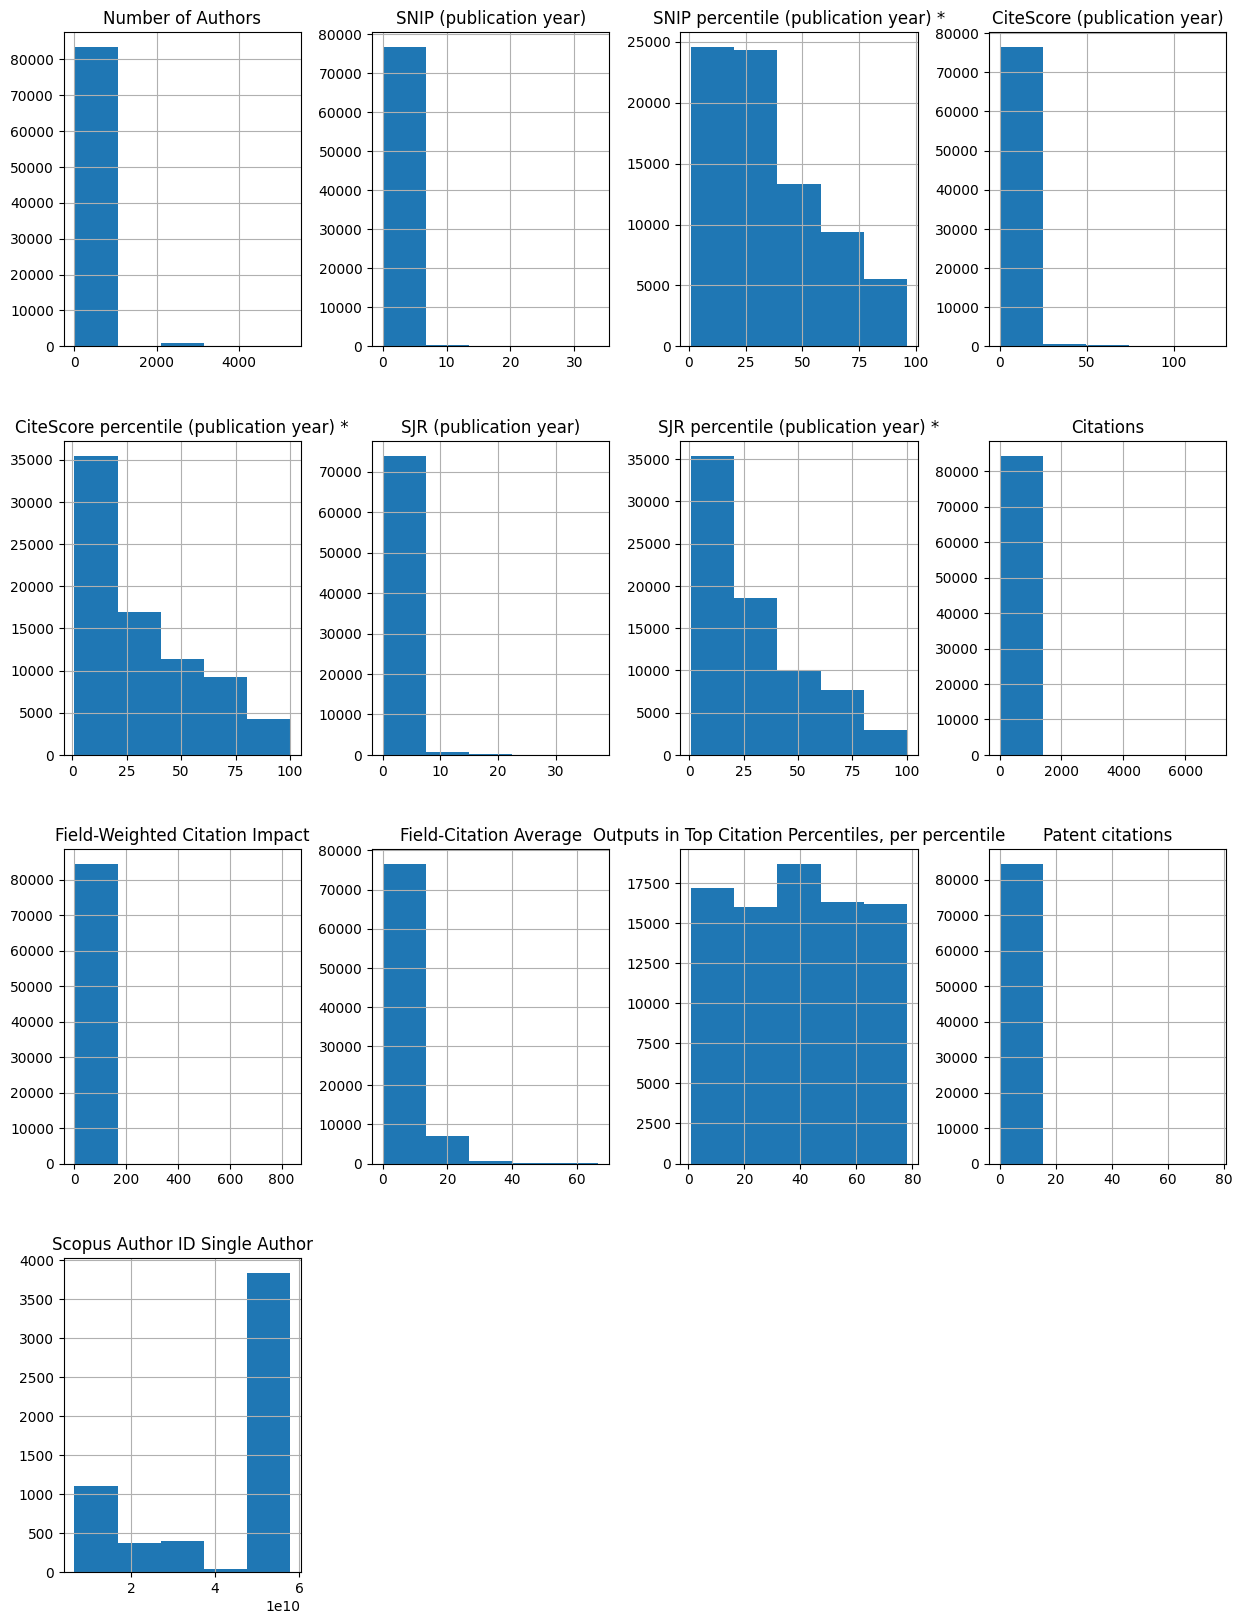

In [31]:
pub.hist(bins=5, figsize=(15,20))

<Axes: xlabel='index', ylabel='Field-Weighted Citation Impact'>

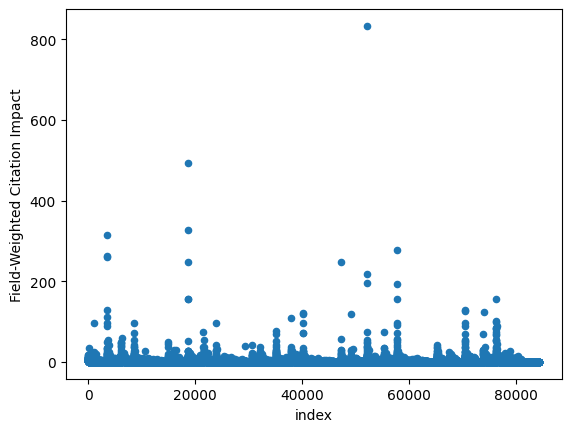

In [32]:
pub.reset_index().plot(kind='scatter', x='index', y='Field-Weighted Citation Impact') #FWCI a partir del 150 o 200 son outliers

<Axes: xlabel='index', ylabel='Patent citations'>

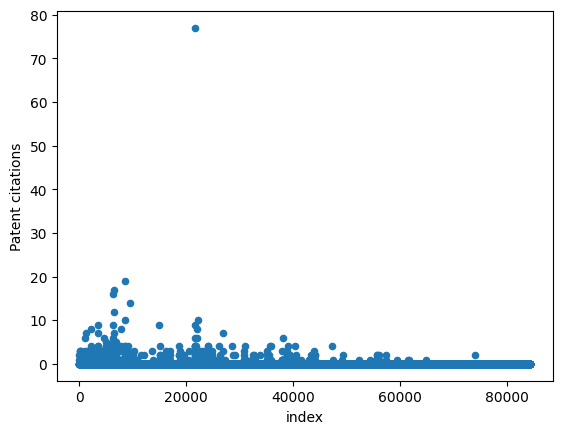

In [33]:
pub.reset_index().plot(kind='scatter', x='index', y='Patent citations') #Un outlier

In [34]:
pub['Full date'] = pd.to_datetime(pub['Full date'], format="%Y-%m-%d")

In [35]:
pub.dtypes

Number of Authors                                               int64
Scopus Author Ids                                              object
Full date                                              datetime64[ns]
SNIP (publication year)                                       float64
SNIP percentile (publication year) *                          float64
CiteScore (publication year)                                  float64
CiteScore percentile (publication year) *                     float64
SJR (publication year)                                        float64
SJR percentile (publication year) *                           float64
Citations                                                       int64
Field-Weighted Citation Impact                                float64
Field-Citation Average                                        float64
Outputs in Top Citation Percentiles, per percentile             int64
Patent citations                                                int64
Scopus Author ID Sin

In [36]:
pub.isna().sum()

Number of Authors                                          0
Scopus Author Ids                                          0
Full date                                                  0
SNIP (publication year)                                 7233
SNIP percentile (publication year) *                    7291
CiteScore (publication year)                            6970
CiteScore percentile (publication year) *               7028
SJR (publication year)                                  9502
SJR percentile (publication year) *                     9605
Citations                                                  0
Field-Weighted Citation Impact                             0
Field-Citation Average                                     0
Outputs in Top Citation Percentiles, per percentile        0
Patent citations                                           0
Scopus Author ID Single Author                         78622
Quacquarelli Symonds (QS) Subject area field name       2063
dtype: int64

Separar por field

In [37]:
pub_fields = pub.copy()
pub_fields['Quacquarelli Symonds (QS) Subject area field name'] = pub_fields['Quacquarelli Symonds (QS) Subject area field name'].str.split('|')
pub_fields = pub_fields.explode('Quacquarelli Symonds (QS) Subject area field name', ignore_index=False)
pub_fields['Quacquarelli Symonds (QS) Subject area field name'] = pub_fields['Quacquarelli Symonds (QS) Subject area field name'].str.lstrip()
fields = pub_fields['Quacquarelli Symonds (QS) Subject area field name'].value_counts().index.tolist()

In [38]:
pub_fields.head()

,Number of Authors,Scopus Author Ids,Full date,SNIP (publication year),SNIP percentile (publication year) *,CiteScore (publication year),CiteScore percentile (publication year) *,SJR (publication year),SJR percentile (publication year) *,Citations,Field-Weighted Citation Impact,Field-Citation Average,"Outputs in Top Citation Percentiles, per percentile",Patent citations,Scopus Author ID Single Author,Quacquarelli Symonds (QS) Subject area field name
0,3,55391699600| 57195591068| 57195530606,2017-08-15,2.80,3.0,12.9,1.0,3.162,1.0,386,16.56,11.23,1,0,NaN,Social Sciences & Management
0,3,55391699600| 57195591068| 57195530606,2017-08-15,2.80,3.0,12.9,1.0,3.162,1.0,386,16.56,11.23,1,0,NaN,Engineering & Technology
1,3,57192253056| 6701780106| 35320015600,2017-03-01,1.20,20.0,4.5,15.0,0.855,19.0,281,5.93,24.09,1,0,NaN,Natural Sciences
1,3,57192253056| 6701780106| 35320015600,2017-03-01,1.20,20.0,4.5,15.0,0.855,19.0,281,5.93,24.09,1,0,NaN,Life Sciences & Medicine
2,8,35241843100| 57194428895| 57194423859| 3660876...,2017-09-01,1.92,6.0,18.0,2.0,3.111,2.0,279,12.71,12.03,1,1,NaN,Life Sciences & Medicine


In [39]:
pub_fields['Quacquarelli Symonds (QS) Subject area field name'].value_counts()

Life Sciences & Medicine        35164
Natural Sciences                34250
Engineering & Technology        26529
Social Sciences & Management    13695
Arts & Humanities                3965
Name: Quacquarelli Symonds (QS) Subject area field name, dtype: int64

In [40]:
pub_fields.isna().sum()

Number of Authors                                           0
Scopus Author Ids                                           0
Full date                                                   0
SNIP (publication year)                                 10459
SNIP percentile (publication year) *                    10518
CiteScore (publication year)                            10148
CiteScore percentile (publication year) *               10207
SJR (publication year)                                  13803
SJR percentile (publication year) *                     13907
Citations                                                   0
Field-Weighted Citation Impact                              0
Field-Citation Average                                      0
Outputs in Top Citation Percentiles, per percentile         0
Patent citations                                            0
Scopus Author ID Single Author                         108167
Quacquarelli Symonds (QS) Subject area field name        2063
dtype: i

In [41]:
def CrearDFField(pub_df, field):
    field_df = pub_df.loc[pub_df['Quacquarelli Symonds (QS) Subject area field name'] == field]
    field_df_auth = field_df.copy()
    field_df_auth['Scopus Author Ids'] = field_df_auth['Scopus Author Ids'].str.split('|')
    field_df_auth = field_df_auth.explode('Scopus Author Ids', ignore_index=True)
    field_df_auth['Scopus Author Ids'] =  field_df_auth['Scopus Author Ids'].fillna('NoValue')
    #field_df_auth_noval = field_df_auth.copy()
    #field_df_auth_noval = field_df_auth_noval.loc[field_df_auth_noval['Scopus Author Ids'] == 'NoValue']
    mask = ((field_df_auth['Scopus Author Ids'] == 'NoValue') & (field_df_auth['Number of Authors']))
    field_df_auth.loc[mask, 'Scopus Author Ids'] = field_df_auth['Scopus Author ID Single Author']
    field_df_g = field_df_auth.loc[:, field_df_auth.columns != 'Scopus Author ID Single Author']
    return field_df_g

Quedarnos con Life Sciencies & Medicine

In [42]:
sci_med = CrearDFField(pub_fields, 'Life Sciences & Medicine')

In [43]:
sci_med.isna().sum()/sci_med.shape[0]*100

Number of Authors                                      0.000000
Scopus Author Ids                                      0.000000
Full date                                              0.000000
SNIP (publication year)                                2.699035
SNIP percentile (publication year) *                   2.699035
CiteScore (publication year)                           2.419122
CiteScore percentile (publication year) *              2.419122
SJR (publication year)                                 2.748231
SJR percentile (publication year) *                    2.808964
Citations                                              0.000000
Field-Weighted Citation Impact                         0.000000
Field-Citation Average                                 0.000000
Outputs in Top Citation Percentiles, per percentile    0.000000
Patent citations                                       0.000000
Quacquarelli Symonds (QS) Subject area field name      0.000000
dtype: float64

In [44]:
sci_med = sci_med.dropna()

In [45]:
sci_med.isna().sum()

Number of Authors                                      0
Scopus Author Ids                                      0
Full date                                              0
SNIP (publication year)                                0
SNIP percentile (publication year) *                   0
CiteScore (publication year)                           0
CiteScore percentile (publication year) *              0
SJR (publication year)                                 0
SJR percentile (publication year) *                    0
Citations                                              0
Field-Weighted Citation Impact                         0
Field-Citation Average                                 0
Outputs in Top Citation Percentiles, per percentile    0
Patent citations                                       0
Quacquarelli Symonds (QS) Subject area field name      0
dtype: int64

Separar Authors

In [46]:
sci_med.rename(columns = {'Scopus Author Ids':'Scopus author ID'}, inplace = True)
sci_med['Scopus author ID'] = sci_med['Scopus author ID'].astype('int')
sci_med = sci_med.loc[:, sci_med.columns != 'Quacquarelli Symonds (QS) Subject area field name']
sci_med.head()

,Number of Authors,Scopus author ID,Full date,SNIP (publication year),SNIP percentile (publication year) *,CiteScore (publication year),CiteScore percentile (publication year) *,SJR (publication year),SJR percentile (publication year) *,Citations,Field-Weighted Citation Impact,Field-Citation Average,"Outputs in Top Citation Percentiles, per percentile",Patent citations
0,3,57192253056,2017-03-01,1.20,20.0,4.5,15.0,0.855,19.0,281,5.93,24.09,1,0
1,3,6701780106,2017-03-01,1.20,20.0,4.5,15.0,0.855,19.0,281,5.93,24.09,1,0
2,3,35320015600,2017-03-01,1.20,20.0,4.5,15.0,0.855,19.0,281,5.93,24.09,1,0
3,8,35241843100,2017-09-01,1.92,6.0,18.0,2.0,3.111,2.0,279,12.71,12.03,1,1
4,8,57194428895,2017-09-01,1.92,6.0,18.0,2.0,3.111,2.0,279,12.71,12.03,1,1


In [47]:
sci_med.shape

(283578, 14)

Dropear duplicados

In [48]:
sci_med.drop_duplicates(inplace = True)

In [49]:
authors = pd.read_excel("AuthorsMetrics2012-2022.xlsx")

In [50]:
authors.isna().sum()

Scopus author ID                                           0
Scholarly Output                                           0
Most recent publication                                    0
Citations                                                  0
Citations per Publication                                  0
Field-Weighted Citation Impact                             7
h-index                                                    0
Output in Top 10% Citation Percentiles (field-weighted)    0
Oldest publication (since 1996)                            0
dtype: int64

In [51]:
authors.shape

(84801, 9)

In [52]:
authors = authors.dropna()

In [53]:
authors.shape

(84794, 9)

In [54]:
authors.head()

,Scopus author ID,Scholarly Output,Most recent publication,Citations,Citations per Publication,Field-Weighted Citation Impact,h-index,Output in Top 10% Citation Percentiles (field-weighted),Oldest publication (since 1996)
0,6503851729,8,2022,53,6.6,0.63,5,0,2004
1,6503865347,2,2019,37,18.5,0.98,6,0,2005
2,6503873393,1,2013,23,23.0,8.42,15,2,2011
3,6503876779,1,2019,1,1.0,0.87,7,0,2019
4,6503884764,3,2016,13,4.3,0.14,3,0,1999


In [55]:
authors.rename(columns = {'Citations':'Citations Authors', 'Field-Weighted Citation Impact':'Field-Weighted Citation Impact Authors'}, inplace = True)
authors.head()

,Scopus author ID,Scholarly Output,Most recent publication,Citations Authors,Citations per Publication,Field-Weighted Citation Impact Authors,h-index,Output in Top 10% Citation Percentiles (field-weighted),Oldest publication (since 1996)
0,6503851729,8,2022,53,6.6,0.63,5,0,2004
1,6503865347,2,2019,37,18.5,0.98,6,0,2005
2,6503873393,1,2013,23,23.0,8.42,15,2,2011
3,6503876779,1,2019,1,1.0,0.87,7,0,2019
4,6503884764,3,2016,13,4.3,0.14,3,0,1999


In [56]:
authors.dtypes

Scopus author ID                                             int64
Scholarly Output                                             int64
Most recent publication                                      int64
Citations Authors                                            int64
Citations per Publication                                  float64
Field-Weighted Citation Impact Authors                     float64
h-index                                                      int64
Output in Top 10% Citation Percentiles (field-weighted)      int64
Oldest publication (since 1996)                              int64
dtype: object

In [57]:
sci_med.shape

(261414, 14)

Merge publicaciones science and medicine y authors

In [58]:
df = sci_med.merge(authors, how='inner', left_on='Scopus author ID', right_on='Scopus author ID')

In [59]:
df

,Number of Authors,Scopus author ID,Full date,SNIP (publication year),SNIP percentile (publication year) *,CiteScore (publication year),CiteScore percentile (publication year) *,SJR (publication year),SJR percentile (publication year) *,Citations,Field-Weighted Citation Impact,Field-Citation Average,"Outputs in Top Citation Percentiles, per percentile",Patent citations,Scholarly Output,Most recent publication,Citations Authors,Citations per Publication,Field-Weighted Citation Impact Authors,h-index,Output in Top 10% Citation Percentiles (field-weighted),Oldest publication (since 1996)
0,3,57192253056,2017-03-01,1.20,20.0,4.5,15.0,0.855,19.0,281,5.93,24.09,1,0,12,2021,437,36.4,1.64,8,1,2016
1,8,57192253056,2018-09-01,1.03,29.0,3.7,26.0,0.783,24.0,19,1.56,10.92,15,0,12,2021,437,36.4,1.64,8,1,2016
2,3,57192253056,2019-06-01,3.84,2.0,14.2,1.0,2.841,1.0,29,0.91,31.75,6,0,12,2021,437,36.4,1.64,8,1,2016
3,4,57192253056,2019-05-01,0.98,33.0,3.7,26.0,0.738,26.0,19,1.69,11.23,11,0,12,2021,437,36.4,1.64,8,1,2016
4,5,57192253056,2019-01-01,1.02,30.0,2.8,33.0,0.519,28.0,3,0.24,12.69,47,0,12,2021,437,36.4,1.64,8,1,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107349,10,57222313664,2021-01-01,1.07,32.0,4.0,53.0,0.916,36.0,0,0.00,3.41,55,0,1,2021,0,0.0,0.00,0,0,2021
107350,10,57222327135,2021-01-01,1.07,32.0,4.0,53.0,0.916,36.0,0,0.00,3.41,55,0,1,2021,0,0.0,0.00,0,0,2021
107351,10,57222314992,2021-01-01,1.07,32.0,4.0,53.0,0.916,36.0,0,0.00,3.41,55,0,1,2021,0,0.0,0.00,0,0,2021
107352,10,57222320987,2021-01-01,1.07,32.0,4.0,53.0,0.916,36.0,0,0.00,3.41,55,0,1,2021,0,0.0,0.00,0,0,2021


In [60]:
df.isna().sum()

Number of Authors                                          0
Scopus author ID                                           0
Full date                                                  0
SNIP (publication year)                                    0
SNIP percentile (publication year) *                       0
CiteScore (publication year)                               0
CiteScore percentile (publication year) *                  0
SJR (publication year)                                     0
SJR percentile (publication year) *                        0
Citations                                                  0
Field-Weighted Citation Impact                             0
Field-Citation Average                                     0
Outputs in Top Citation Percentiles, per percentile        0
Patent citations                                           0
Scholarly Output                                           0
Most recent publication                                    0
Citations Authors       

In [61]:
df.shape

(107354, 22)

In [62]:
df.head(10)

,Number of Authors,Scopus author ID,Full date,SNIP (publication year),SNIP percentile (publication year) *,CiteScore (publication year),CiteScore percentile (publication year) *,SJR (publication year),SJR percentile (publication year) *,Citations,Field-Weighted Citation Impact,Field-Citation Average,"Outputs in Top Citation Percentiles, per percentile",Patent citations,Scholarly Output,Most recent publication,Citations Authors,Citations per Publication,Field-Weighted Citation Impact Authors,h-index,Output in Top 10% Citation Percentiles (field-weighted),Oldest publication (since 1996)
0,3,57192253056,2017-03-01,1.20,20.0,4.5,15.0,0.855,19.0,281,5.93,24.09,1,0,12,2021,437,36.4,1.64,8,1,2016
1,8,57192253056,2018-09-01,1.03,29.0,3.7,26.0,0.783,24.0,19,1.56,10.92,15,0,12,2021,437,36.4,1.64,8,1,2016
2,3,57192253056,2019-06-01,3.84,2.0,14.2,1.0,2.841,1.0,29,0.91,31.75,6,0,12,2021,437,36.4,1.64,8,1,2016
3,4,57192253056,2019-05-01,0.98,33.0,3.7,26.0,0.738,26.0,19,1.69,11.23,11,0,12,2021,437,36.4,1.64,8,1,2016
4,5,57192253056,2019-01-01,1.02,30.0,2.8,33.0,0.519,28.0,3,0.24,12.69,47,0,12,2021,437,36.4,1.64,8,1,2016
5,4,57192253056,2020-01-01,0.97,37.0,3.3,33.0,0.535,29.0,16,1.82,8.78,9,0,12,2021,437,36.4,1.64,8,1,2016
6,7,57192253056,2020-03-01,2.22,6.0,11.9,3.0,1.772,4.0,14,1.74,8.05,10,0,12,2021,437,36.4,1.64,8,1,2016
7,5,57192253056,2020-05-01,1.43,17.0,6.0,17.0,1.455,7.0,12,1.53,7.86,13,0,12,2021,437,36.4,1.64,8,1,2016
8,6,57192253056,2020-01-01,0.97,37.0,3.3,33.0,0.535,29.0,5,0.57,8.78,29,0,12,2021,437,36.4,1.64,8,1,2016
9,3,35320015600,2017-03-01,1.20,20.0,4.5,15.0,0.855,19.0,281,5.93,24.09,1,0,82,2022,2232,27.2,1.89,26,21,2010


In [63]:
df.drop_duplicates(inplace = True) 

In [64]:
df.shape

(106910, 22)

In [65]:
df.dtypes

Number of Authors                                                   int64
Scopus author ID                                                    int64
Full date                                                  datetime64[ns]
SNIP (publication year)                                           float64
SNIP percentile (publication year) *                              float64
CiteScore (publication year)                                      float64
CiteScore percentile (publication year) *                         float64
SJR (publication year)                                            float64
SJR percentile (publication year) *                               float64
Citations                                                           int64
Field-Weighted Citation Impact                                    float64
Field-Citation Average                                            float64
Outputs in Top Citation Percentiles, per percentile                 int64
Patent citations                      

Agregar columna con número de publicaciones

In [66]:
df.loc[df['Scopus author ID'] == 35320015600].shape

(41, 22)

In [67]:
df['Number of Publications'] = df.groupby('Scopus author ID')['Scopus author ID'].transform('count')

In [68]:
df.loc[df['Scopus author ID'] == 35320015600]

,Number of Authors,Scopus author ID,Full date,SNIP (publication year),SNIP percentile (publication year) *,CiteScore (publication year),CiteScore percentile (publication year) *,SJR (publication year),SJR percentile (publication year) *,Citations,Field-Weighted Citation Impact,Field-Citation Average,"Outputs in Top Citation Percentiles, per percentile",Patent citations,Scholarly Output,Most recent publication,Citations Authors,Citations per Publication,Field-Weighted Citation Impact Authors,h-index,Output in Top 10% Citation Percentiles (field-weighted),Oldest publication (since 1996),Number of Publications
9,3,35320015600,2017-03-01,1.20,20.0,4.5,15.0,0.855,19.0,281,5.93,24.09,1,0,82,2022,2232,27.2,1.89,26,21,2010,41
10,5,35320015600,2017-11-04,1.16,22.0,5.1,17.0,1.260,12.0,76,2.65,11.34,3,0,82,2022,2232,27.2,1.89,26,21,2010,41
11,5,35320015600,2017-07-01,1.20,20.0,4.5,15.0,0.855,19.0,63,2.79,10.02,4,0,82,2022,2232,27.2,1.89,26,21,2010,41
12,3,35320015600,2017-04-01,1.20,20.0,4.5,15.0,0.855,19.0,60,2.99,10.02,4,0,82,2022,2232,27.2,1.89,26,21,2010,41
13,5,35320015600,2017-07-01,2.15,5.0,8.9,2.0,1.793,3.0,54,2.99,10.38,5,0,82,2022,2232,27.2,1.89,26,21,2010,41
14,4,35320015600,2017-04-01,1.20,20.0,4.5,15.0,0.855,19.0,39,2.40,10.02,7,0,82,2022,2232,27.2,1.89,26,21,2010,41
15,6,35320015600,2017-02-01,2.47,3.0,9.1,1.0,2.344,1.0,37,17.76,0.84,8,0,82,2022,2232,27.2,1.89,26,21,2010,41
16,2,35320015600,2017-08-01,1.20,20.0,4.5,15.0,0.855,19.0,4,1.09,1.84,50,0,82,2022,2232,27.2,1.89,26,21,2010,41
17,7,35320015600,2018-11-01,2.21,5.0,6.8,1.0,1.664,1.0,24,2.39,7.53,11,0,82,2022,2232,27.2,1.89,26,21,2010,41
18,8,35320015600,2018-09-01,1.03,29.0,3.7,26.0,0.783,24.0,19,1.56,10.92,15,0,82,2022,2232,27.2,1.89,26,21,2010,41


In [69]:
#mdf = df.groupby('Scopus author ID').mean()
#mdf.reset_index(inplace = True)
#mdf.drop('Scopus author ID', axis = 1, inplace = True)

Aggregate columans

In [70]:
adf = df.groupby('Scopus author ID').agg({"SNIP (publication year)" : np.mean, 
                                          "CiteScore (publication year)" : np.mean,
                                          "SJR (publication year)" : np.mean,
                                          "Citations" : np.sum, 
                                          "Field-Weighted Citation Impact" : np.mean,
                                          "Field-Citation Average" : np.sum,
                                          "Patent citations" : np.mean, 
                                          "Scholarly Output" : np.mean, 
                                          "Most recent publication" : min, 
                                          "Citations Authors" : np.mean, 
                                          "Citations per Publication" : np.mean, 
                                          "Field-Weighted Citation Impact Authors" : np.mean, 
                                          "h-index" : np.mean, 
                                          "Output in Top 10% Citation Percentiles (field-weighted)" : np.mean, 
                                          "Oldest publication (since 1996)" : min,
                                          "Number of Publications" : np.mean})





In [71]:
adf.reset_index(inplace = True)

In [72]:
df.head()

,Number of Authors,Scopus author ID,Full date,SNIP (publication year),SNIP percentile (publication year) *,CiteScore (publication year),CiteScore percentile (publication year) *,SJR (publication year),SJR percentile (publication year) *,Citations,Field-Weighted Citation Impact,Field-Citation Average,"Outputs in Top Citation Percentiles, per percentile",Patent citations,Scholarly Output,Most recent publication,Citations Authors,Citations per Publication,Field-Weighted Citation Impact Authors,h-index,Output in Top 10% Citation Percentiles (field-weighted),Oldest publication (since 1996),Number of Publications
0,3,57192253056,2017-03-01,1.20,20.0,4.5,15.0,0.855,19.0,281,5.93,24.09,1,0,12,2021,437,36.4,1.64,8,1,2016,9
1,8,57192253056,2018-09-01,1.03,29.0,3.7,26.0,0.783,24.0,19,1.56,10.92,15,0,12,2021,437,36.4,1.64,8,1,2016,9
2,3,57192253056,2019-06-01,3.84,2.0,14.2,1.0,2.841,1.0,29,0.91,31.75,6,0,12,2021,437,36.4,1.64,8,1,2016,9
3,4,57192253056,2019-05-01,0.98,33.0,3.7,26.0,0.738,26.0,19,1.69,11.23,11,0,12,2021,437,36.4,1.64,8,1,2016,9
4,5,57192253056,2019-01-01,1.02,30.0,2.8,33.0,0.519,28.0,3,0.24,12.69,47,0,12,2021,437,36.4,1.64,8,1,2016,9


In [73]:
adf.head()

,Scopus author ID,SNIP (publication year),CiteScore (publication year),SJR (publication year),Citations,Field-Weighted Citation Impact,Field-Citation Average,Patent citations,Scholarly Output,Most recent publication,Citations Authors,Citations per Publication,Field-Weighted Citation Impact Authors,h-index,Output in Top 10% Citation Percentiles (field-weighted),Oldest publication (since 1996),Number of Publications
0,6503851729,0.952500,4.750000,0.943250,26,0.415000,38.92,0.0,8.0,2022,53.0,6.6,0.63,5.0,0.0,2004,4.0
1,6503865347,0.937500,3.650000,1.032250,26,0.702500,31.56,0.0,2.0,2019,37.0,18.5,0.98,6.0,0.0,2005,4.0
2,6503893953,0.690000,3.150000,0.633000,5,0.185000,34.23,0.0,1.0,2017,20.0,20.0,0.54,4.0,0.0,2017,2.0
3,6503898545,1.491111,4.777778,1.178667,71,0.933333,63.00,0.0,1.0,2012,21.0,21.0,0.52,18.0,0.0,1999,9.0
4,6503901835,1.305000,7.183333,1.506667,20,0.390000,52.79,0.0,16.0,2022,105.0,6.6,0.38,7.0,0.0,2004,6.0


In [74]:
df.loc[df['Scopus author ID'] == 6503851729]

,Number of Authors,Scopus author ID,Full date,SNIP (publication year),SNIP percentile (publication year) *,CiteScore (publication year),CiteScore percentile (publication year) *,SJR (publication year),SJR percentile (publication year) *,Citations,Field-Weighted Citation Impact,Field-Citation Average,"Outputs in Top Citation Percentiles, per percentile",Patent citations,Scholarly Output,Most recent publication,Citations Authors,Citations per Publication,Field-Weighted Citation Impact Authors,h-index,Output in Top 10% Citation Percentiles (field-weighted),Oldest publication (since 1996),Number of Publications
10834,7,6503851729,2017-03-01,1.15,22.0,5.7,8.0,1.164,13.0,21,1.49,10.76,16,0,8,2022,53,6.6,0.63,5,0,2004,4
10835,9,6503851729,2018-08-01,0.65,54.0,2.8,46.0,0.746,34.0,5,0.17,18.03,43,0,8,2022,53,6.6,0.63,5,0,2004,4
10836,6,6503851729,2020-11-15,0.94,38.0,5.8,18.0,1.097,16.0,0,0.00,7.49,71,0,8,2022,53,6.6,0.63,5,0,2004,4
10837,12,6503851729,2021-04-27,1.07,32.0,4.7,15.0,0.766,17.0,0,0.00,2.64,55,0,8,2022,53,6.6,0.63,5,0,2004,4


In [75]:
drop_cols = ['Citations', 'Field-Weighted Citation Impact', 'Field-Citation Average', 'Patent citations']

adf.drop(drop_cols, axis = 1, inplace = True)

adf.head()

,Scopus author ID,SNIP (publication year),CiteScore (publication year),SJR (publication year),Scholarly Output,Most recent publication,Citations Authors,Citations per Publication,Field-Weighted Citation Impact Authors,h-index,Output in Top 10% Citation Percentiles (field-weighted),Oldest publication (since 1996),Number of Publications
0,6503851729,0.952500,4.750000,0.943250,8.0,2022,53.0,6.6,0.63,5.0,0.0,2004,4.0
1,6503865347,0.937500,3.650000,1.032250,2.0,2019,37.0,18.5,0.98,6.0,0.0,2005,4.0
2,6503893953,0.690000,3.150000,0.633000,1.0,2017,20.0,20.0,0.54,4.0,0.0,2017,2.0
3,6503898545,1.491111,4.777778,1.178667,1.0,2012,21.0,21.0,0.52,18.0,0.0,1999,9.0
4,6503901835,1.305000,7.183333,1.506667,16.0,2022,105.0,6.6,0.38,7.0,0.0,2004,6.0


# Modelo

Linear Regression

In [76]:
target = 'Field-Weighted Citation Impact Authors'

corr = adf.corr()
corr.style.background_gradient(cmap = 'coolwarm')

,Scopus author ID,SNIP (publication year),CiteScore (publication year),SJR (publication year),Scholarly Output,Most recent publication,Citations Authors,Citations per Publication,Field-Weighted Citation Impact Authors,h-index,Output in Top 10% Citation Percentiles (field-weighted),Oldest publication (since 1996),Number of Publications
Scopus author ID,1.000000,-0.020640,-0.017287,-0.018538,-0.289846,0.000205,-0.119966,-0.042340,-0.013352,-0.490108,-0.146942,0.654151,-0.224279
SNIP (publication year),-0.020640,1.000000,0.877649,0.753053,0.065476,0.074048,0.094563,0.179420,0.268632,0.178622,0.089560,0.017780,0.047400
CiteScore (publication year),-0.017287,0.877649,1.000000,0.890225,0.075502,0.074528,0.122963,0.206050,0.245975,0.221515,0.112091,0.017158,0.044391
SJR (publication year),-0.018538,0.753053,0.890225,1.000000,0.056652,0.005592,0.130235,0.255870,0.237357,0.220971,0.108975,0.004394,0.036664
Scholarly Output,-0.289846,0.065476,0.075502,0.056652,1.000000,0.265709,0.664193,0.043756,0.033693,0.559310,0.719780,-0.429528,0.543798
Most recent publication,0.000205,0.074048,0.074528,0.005592,0.265709,1.000000,0.075505,-0.085257,-0.007100,0.015747,0.101208,0.025027,0.127697
Citations Authors,-0.119966,0.094563,0.122963,0.130235,0.664193,0.075505,1.000000,0.225087,0.178814,0.440505,0.847405,-0.165296,0.226603
Citations per Publication,-0.042340,0.179420,0.206050,0.255870,0.043756,-0.085257,0.225087,1.000000,0.855419,0.167120,0.084970,-0.067628,0.034133
Field-Weighted Citation Impact Authors,-0.013352,0.268632,0.245975,0.237357,0.033693,-0.007100,0.178814,0.855419,1.000000,0.137361,0.074750,-0.009911,0.028215
h-index,-0.490108,0.178622,0.221515,0.220971,0.559310,0.015747,0.440505,0.167120,0.137361,1.000000,0.492869,-0.474024,0.429458


In [77]:
X = adf.drop(target,axis=1)

Y = adf[target]
Y.head()

0    0.63
1    0.98
2    0.54
3    0.52
4    0.38
Name: Field-Weighted Citation Impact Authors, dtype: float64

In [78]:
from matplotlib import pyplot as plt

<Axes: >

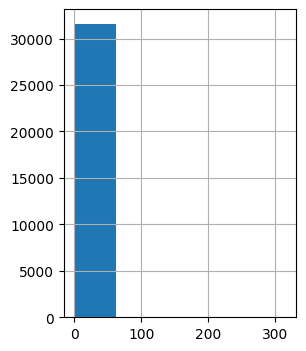

In [79]:
Y.hist(bins=5, figsize=(3,4))

In [80]:
import statsmodels.api as sm

from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [81]:
Xc = sm.add_constant(X) #para obtener la ordenada en el origen
model = sm.OLS(Y, Xc) #Ordinary Least Squares
results = model.fit()
print(results.summary())
print('\n')
results.mse_resid
#results.rsquared_adj

                                      OLS Regression Results                                      
Dep. Variable:     Field-Weighted Citation Impact Authors   R-squared:                       0.761
Model:                                                OLS   Adj. R-squared:                  0.761
Method:                                     Least Squares   F-statistic:                     8383.
Date:                                    Sat, 18 Mar 2023   Prob (F-statistic):               0.00
Time:                                            13:22:42   Log-Likelihood:                -60724.
No. Observations:                                   31581   AIC:                         1.215e+05
Df Residuals:                                       31568   BIC:                         1.216e+05
Df Model:                                              12                                         
Covariance Type:                                nonrobust                                         
          

2.740541060085594

In [82]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [83]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=.30,random_state=0)

In [84]:
print('Observaciones para el training:',X_train.shape[0],'Observaciones para el test:',X_test.shape[0])

Observaciones para el training: 22106 Observaciones para el test: 9475


In [85]:
model = LinearRegression()  
model.fit(X_train,y_train)

predictions = model.predict(X_test)


print('Puntaje entrenamiento: {}\n'.format(model.score(X_train,y_train)))           # R^2 se evalúa en el entrenamiento
print('Puntaje Test: {}\n'.format(model.score(X_test,y_test)))                      # R^2 en test
print(model.intercept_, model.coef_)

print('\n')

print('MAE',mean_absolute_error(y_test, predictions)) #mean absolute error
print('MSE',mean_squared_error(y_test, predictions))  #mean squared error

Puntaje entrenamiento: 0.6130937997490049

Puntaje Test: 0.7685642167690098

-161.82606887468242 [-5.69355969e-13  7.99160673e-01  2.78221671e-02 -2.72898192e-01
 -5.94466691e-03  6.35354018e-02 -2.37226927e-05  4.60106858e-02
  1.54895620e-03  1.67634059e-02  1.64829281e-02  5.81310715e-03]


MAE 0.48693553146011953
MSE 6.687731565621054


Cross validation

In [86]:
from sklearn.model_selection import cross_val_score
model = LinearRegression()
scores = cross_val_score(model, X, Y, cv=5)

In [87]:
print('Scores:',scores)
print('Mean score:',scores.mean())
print('Score standard deviation:',scores.std())

Scores: [ 0.62048168  0.91684223 -0.81038548  0.76298428  0.46901935]
Mean score: 0.39178841138459164
Score standard deviation: 0.619185785805476


Random Forest

In [88]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(max_depth=10,max_leaf_nodes=50)
scores = cross_val_score(model, X, Y, cv=5)

In [89]:
print('Scores:',scores)
print('Mean score:',scores.mean())
print('Score standard deviation:',scores.std())

Scores: [ 0.51555317  0.92937149 -0.82436275  0.56452759  0.82758666]
Mean score: 0.40253523300450034
Score standard deviation: 0.6328536008346693


Modelo eliminando los ceros del FWCI de Authors

Quitar las Field-Weighted Citation Impact Authors que son 0 y tienen menor o igual que una publicación

In [90]:
tldf = adf.loc[~(adf['Field-Weighted Citation Impact Authors'] == 0.0) ]

In [91]:
tldf.loc[adf['Field-Weighted Citation Impact Authors'] == 0.0]

,Scopus author ID,SNIP (publication year),CiteScore (publication year),SJR (publication year),Scholarly Output,Most recent publication,Citations Authors,Citations per Publication,Field-Weighted Citation Impact Authors,h-index,Output in Top 10% Citation Percentiles (field-weighted),Oldest publication (since 1996),Number of Publications


In [92]:
target = 'Field-Weighted Citation Impact Authors'

X = adf.drop(target,axis=1)

Y = adf[target]
Y.head()

0    0.63
1    0.98
2    0.54
3    0.52
4    0.38
Name: Field-Weighted Citation Impact Authors, dtype: float64

In [93]:
from matplotlib import pyplot as plt

In [94]:
Y = np.sqrt(Y)

In [95]:
Y

0        0.793725
1        0.989949
2        0.734847
3        0.721110
4        0.616441
           ...   
31576    0.655744
31577    0.754983
31578    0.754983
31579    0.616441
31580    1.157584
Name: Field-Weighted Citation Impact Authors, Length: 31581, dtype: float64

(array([3.0594e+04, 9.1000e+02, 5.0000e+01, 1.8000e+01, 3.0000e+00,
        2.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 3.0000e+00]),
 array([ 0.        ,  1.77496479,  3.54992958,  5.32489437,  7.09985915,
         8.87482394, 10.64978873, 12.42475352, 14.19971831, 15.9746831 ,
        17.74964788]),
 <BarContainer object of 10 artists>)

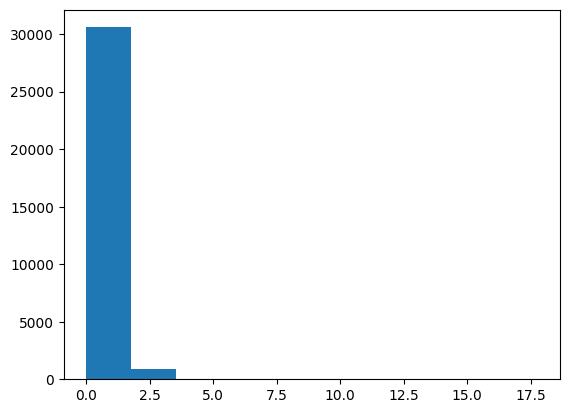

In [96]:
plt.hist(Y)

In [97]:
Xc = sm.add_constant(X) #para obtener la ordenada en el origen
model = sm.OLS(Y, Xc) #Ordinary Least Squares
results = model.fit()
print(results.summary())
print('\n')
results.mse_resid
#results.rsquared_adj

                                      OLS Regression Results                                      
Dep. Variable:     Field-Weighted Citation Impact Authors   R-squared:                       0.448
Model:                                                OLS   Adj. R-squared:                  0.448
Method:                                     Least Squares   F-statistic:                     2134.
Date:                                    Sat, 18 Mar 2023   Prob (F-statistic):               0.00
Time:                                            13:23:08   Log-Likelihood:                -16295.
No. Observations:                                   31581   AIC:                         3.262e+04
Df Residuals:                                       31568   BIC:                         3.273e+04
Df Model:                                              12                                         
Covariance Type:                                nonrobust                                         
          

0.16439348931460757

In [98]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=.30,random_state=0)

In [99]:
model = LinearRegression()  
model.fit(X_train,y_train)

predictions = model.predict(X_test)


print('Puntaje entrenamiento: {}\n'.format(model.score(X_train,y_train)))           # R^2 se evalúa en el entrenamiento
print('Puntaje Test: {}\n'.format(model.score(X_test,y_test)))                      # R^2 en test
print(model.intercept_, model.coef_)

print('\n')

print('MAE',mean_absolute_error(y_test, predictions)) #mean absolute error
print('MSE',mean_squared_error(y_test, predictions))  #mean squared error

Puntaje entrenamiento: 0.45141788981887687

Puntaje Test: 0.2460380191619529

-24.639023352008383 [ 1.29712089e-12  1.51610949e-01  1.98345023e-02 -3.52779440e-02
 -5.88426832e-04  1.40947218e-02 -7.65093427e-05  8.24653521e-03
  5.61132265e-03  1.29951122e-02 -1.72331005e-03  3.83055919e-03]


MAE 0.27911922774729553
MSE 0.2687510129125586


Power transformer

In [100]:
tldf = adf.loc[adf['Field-Weighted Citation Impact Authors'] != 0.0]

target = 'Field-Weighted Citation Impact Authors'

X = adf.drop(target,axis=1)

Y = adf[target]
Y.head()

0    0.63
1    0.98
2    0.54
3    0.52
4    0.38
Name: Field-Weighted Citation Impact Authors, dtype: float64

In [101]:
from numpy import exp
from numpy.random import randn
from sklearn.preprocessing import PowerTransformer

In [102]:
power = PowerTransformer(method='yeo-johnson', standardize=True)
Y = power.fit_transform(np.array(Y).reshape(-1, 1))


(array([3837.,  506.,  979., 1412., 1050., 1859., 1759., 2105., 2250.,
        2117., 2344., 2054., 1943., 1722., 1439., 1142.,  883.,  681.,
         500.,  353.,  275.,  177.,  103.,   50.,   41.]),
 array([-1.63301683, -1.44907054, -1.26512424, -1.08117795, -0.89723165,
        -0.71328536, -0.52933906, -0.34539277, -0.16144647,  0.02249982,
         0.20644612,  0.39039241,  0.57433871,  0.758285  ,  0.9422313 ,
         1.12617759,  1.31012389,  1.49407018,  1.67801648,  1.86196277,
         2.04590907,  2.22985536,  2.41380166,  2.59774796,  2.78169425,
         2.96564055]),
 <BarContainer object of 25 artists>)

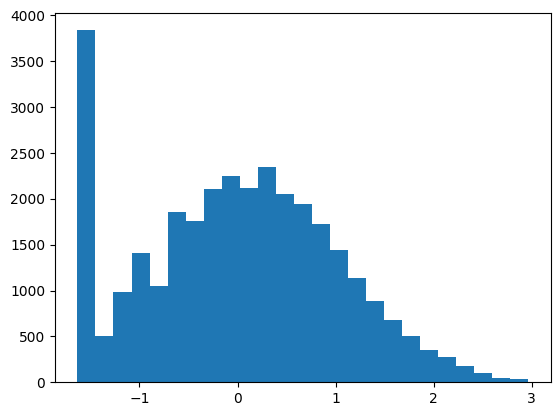

In [103]:
plt.hist(Y, bins=25)

In [104]:
Xc = sm.add_constant(X) #para obtener la ordenada en el origen
model = sm.OLS(Y, Xc) #Ordinary Least Squares
results = model.fit()
print(results.summary())
print('\n')
results.mse_resid
#results.rsquared_adj

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.236
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     810.6
Date:                Sat, 18 Mar 2023   Prob (F-statistic):               0.00
Time:                        13:23:08   Log-Likelihood:                -40570.
No. Observations:               31581   AIC:                         8.117e+04
Df Residuals:                   31568   BIC:                         8.128e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                                              coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------

0.7647664769789597

In [105]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=.30,random_state=0)

In [106]:
model = LinearRegression()  
model.fit(X_train,y_train)

predictions = model.predict(X_test)


print('Puntaje entrenamiento: {}\n'.format(model.score(X_train,y_train)))           # R^2 se evalúa en el entrenamiento
print('Puntaje Test: {}\n'.format(model.score(X_test,y_test)))                      # R^2 en test
print(model.intercept_, model.coef_)

print('\n')

print('MAE',mean_absolute_error(y_test, predictions)) #mean absolute error
print('MSE',mean_squared_error(y_test, predictions))  #mean squared error

Puntaje entrenamiento: 0.2811511595394397

Puntaje Test: -0.12557457399553873

[-28.61908441] [[ 3.38698484e-12  1.61200113e-01  4.94695837e-02 -3.80287994e-02
   1.95706343e-03  2.06866130e-02 -2.63966910e-04  9.24398438e-03
   1.54110640e-02  3.11940441e-02 -6.91631519e-03  8.69574275e-03]]


MAE 0.6935605988849728
MSE 1.1385747338640384


Modelo publicaciones a lo largo del tiempo

In [107]:
adf.head()

,Scopus author ID,SNIP (publication year),CiteScore (publication year),SJR (publication year),Scholarly Output,Most recent publication,Citations Authors,Citations per Publication,Field-Weighted Citation Impact Authors,h-index,Output in Top 10% Citation Percentiles (field-weighted),Oldest publication (since 1996),Number of Publications
0,6503851729,0.952500,4.750000,0.943250,8.0,2022,53.0,6.6,0.63,5.0,0.0,2004,4.0
1,6503865347,0.937500,3.650000,1.032250,2.0,2019,37.0,18.5,0.98,6.0,0.0,2005,4.0
2,6503893953,0.690000,3.150000,0.633000,1.0,2017,20.0,20.0,0.54,4.0,0.0,2017,2.0
3,6503898545,1.491111,4.777778,1.178667,1.0,2012,21.0,21.0,0.52,18.0,0.0,1999,9.0
4,6503901835,1.305000,7.183333,1.506667,16.0,2022,105.0,6.6,0.38,7.0,0.0,2004,6.0


In [108]:
adf['Publication average per year'] = adf['Number of Publications']/\
(adf['Most recent publication'] - adf['Oldest publication (since 1996)'] + 1)
                                       
                                       
                                       

In [109]:
adf.head(10)

,Scopus author ID,SNIP (publication year),CiteScore (publication year),SJR (publication year),Scholarly Output,Most recent publication,Citations Authors,Citations per Publication,Field-Weighted Citation Impact Authors,h-index,Output in Top 10% Citation Percentiles (field-weighted),Oldest publication (since 1996),Number of Publications,Publication average per year
0,6503851729,0.952500,4.750000,0.943250,8.0,2022,53.0,6.6,0.63,5.0,0.0,2004,4.0,0.210526
1,6503865347,0.937500,3.650000,1.032250,2.0,2019,37.0,18.5,0.98,6.0,0.0,2005,4.0,0.266667
2,6503893953,0.690000,3.150000,0.633000,1.0,2017,20.0,20.0,0.54,4.0,0.0,2017,2.0,2.000000
3,6503898545,1.491111,4.777778,1.178667,1.0,2012,21.0,21.0,0.52,18.0,0.0,1999,9.0,0.642857
4,6503901835,1.305000,7.183333,1.506667,16.0,2022,105.0,6.6,0.38,7.0,0.0,2004,6.0,0.315789
5,6503911332,0.947500,3.450000,0.584625,14.0,2022,77.0,5.5,0.64,8.0,0.0,2003,8.0,0.400000
6,6503915254,2.915000,14.100000,3.150500,2.0,2020,207.0,103.5,7.29,2.0,1.0,2020,2.0,2.000000
7,6503931006,1.076667,6.233333,0.807333,8.0,2022,36.0,4.5,0.31,6.0,0.0,2004,3.0,0.157895
8,6503942807,0.850000,1.100000,0.395000,1.0,2012,27.0,27.0,0.25,4.0,0.0,2003,1.0,0.100000
9,6503954796,1.685000,8.050000,1.811000,3.0,2016,83.0,27.7,1.76,9.0,1.0,2004,2.0,0.153846


# Detectar Rising-Stars

Metricas a usar:
- Citations per Publication
- Field-Weighted Citation Impact Authors
- h-index
- Publication average per year

<Axes: xlabel='index', ylabel='Citations per Publication'>

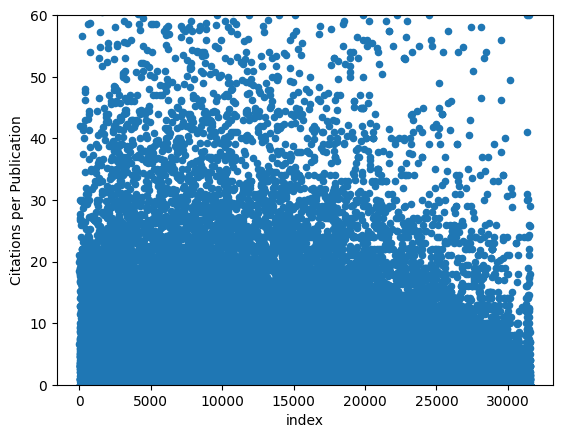

In [110]:
adf.reset_index().plot(kind='scatter', x='index', y='Citations per Publication', ylim = (0, 60) ) #Un outlier

<Axes: xlabel='index', ylabel='Field-Weighted Citation Impact Authors'>

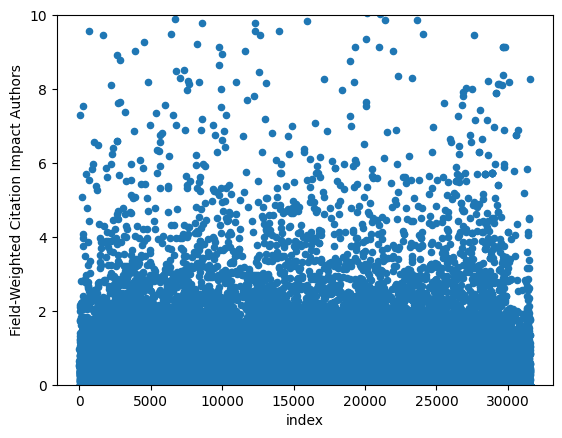

In [111]:
adf.reset_index().plot(kind='scatter', x='index', y='Field-Weighted Citation Impact Authors', ylim = (0,10))#Un outlier

<Axes: xlabel='index', ylabel='Publication average per year'>

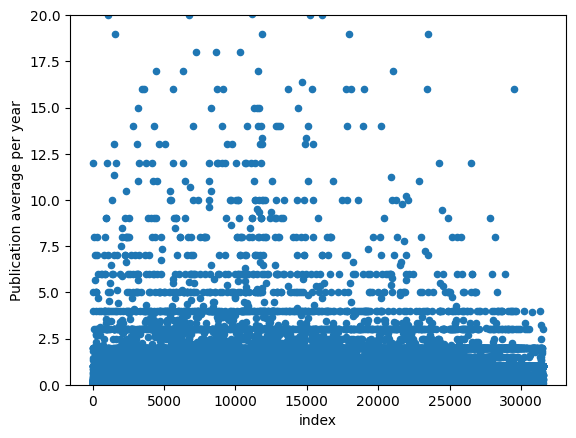

In [112]:
adf.reset_index().plot(kind='scatter', x='index', y='Publication average per year', ylim = (0,20)) #Un outlier

<Axes: xlabel='index', ylabel='h-index'>

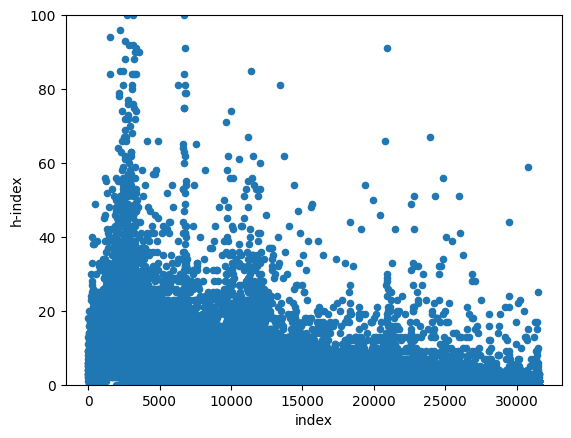

In [113]:
adf.reset_index().plot(kind='scatter', x='index', y='h-index', ylim = (0,100)) #Un outlier

In [114]:
rsdf = adf.loc[(adf['h-index']>=30) &\
        (adf['Publication average per year']>=4) &\
        (adf['Field-Weighted Citation Impact Authors']>=3) &\
       (adf['Citations per Publication']>=40) ]

In [115]:
rsdf

,Scopus author ID,SNIP (publication year),CiteScore (publication year),SJR (publication year),Scholarly Output,Most recent publication,Citations Authors,Citations per Publication,Field-Weighted Citation Impact Authors,h-index,Output in Top 10% Citation Percentiles (field-weighted),Oldest publication (since 1996),Number of Publications,Publication average per year
1446,6602776079,1.298333,9.450000,3.678333,1.0,2017,82.0,82.0,3.51,39.0,1.0,2017,6.0,6.000000
2251,7003572421,9.344444,47.177778,11.031111,1.0,2021,203.0,203.0,96.39,85.0,1.0,2021,9.0,9.000000
3223,7202378672,1.632857,9.357143,2.343000,1.0,2020,53.0,53.0,7.38,88.0,1.0,2020,7.0,7.000000
9892,55613845800,1.514000,8.820000,3.420400,1.0,2016,56.0,56.0,4.10,35.0,1.0,2016,5.0,5.000000
10001,55648437100,2.305000,14.523684,4.413684,72.0,2022,4441.0,61.7,3.04,74.0,32.0,2015,38.0,4.750000
10697,55906762400,1.458889,9.302222,2.500733,55.0,2020,3936.0,71.6,3.01,43.0,27.0,2013,45.0,5.625000
11557,56000834200,1.375714,5.807143,1.201357,1.0,2015,982.0,982.0,39.54,35.0,1.0,2015,14.0,14.000000
21520,57204092789,3.579118,14.376471,3.111500,60.0,2022,14753.0,245.9,26.91,42.0,20.0,2016,34.0,4.857143


In [116]:
rsdf.shape[0]/adf.shape[0]*100

0.025331686773693046

Graph skills por Rising Star

In [117]:
rsdf.reset_index(inplace = True)
rsdf[['Scopus author ID', 'h-index', 'Publication average per year', 'Field-Weighted Citation Impact Authors', 'Citations per Publication']]

,Scopus author ID,h-index,Publication average per year,Field-Weighted Citation Impact Authors,Citations per Publication
0,6602776079,39.0,6.000000,3.51,82.0
1,7003572421,85.0,9.000000,96.39,203.0
2,7202378672,88.0,7.000000,7.38,53.0
3,55613845800,35.0,5.000000,4.10,56.0
4,55648437100,74.0,4.750000,3.04,61.7
5,55906762400,43.0,5.625000,3.01,71.6
6,56000834200,35.0,14.000000,39.54,982.0
7,57204092789,42.0,4.857143,26.91,245.9


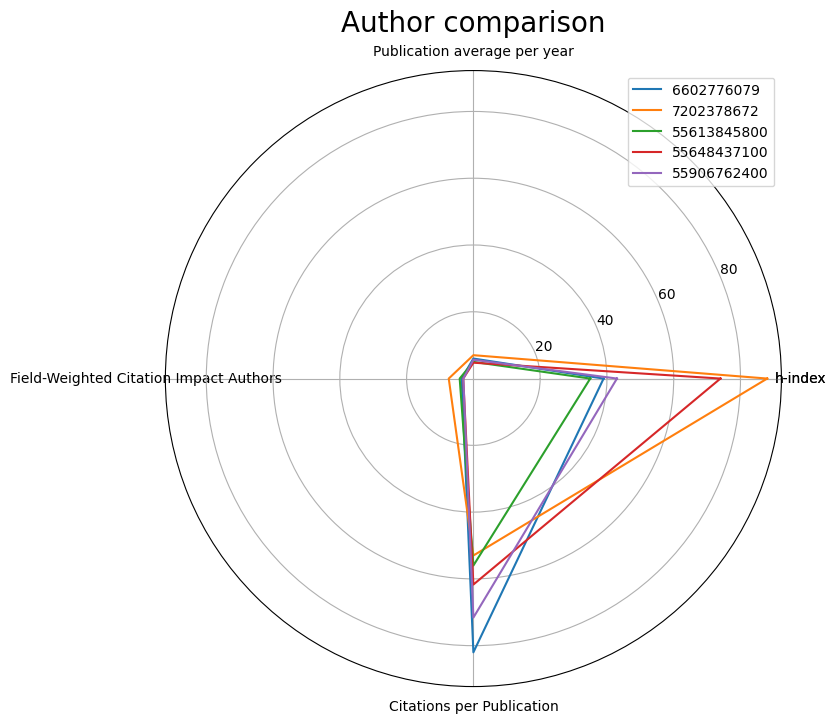

In [118]:
categories = np.array(['h-index', 'Publication average per year', 'Field-Weighted Citation Impact Authors', 'Citations per Publication'])
categories = [*categories, categories[0]]

a1 = rsdf.loc[0, categories].values
a3 = rsdf.loc[2, categories].values
a4 = rsdf.loc[3, categories].values
a5 = rsdf.loc[4, categories].values
a6 = rsdf.loc[5, categories].values

label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(a1))

plt.figure(figsize=(8, 8))
plt.subplot(polar=True)
plt.plot(label_loc, a1, label=rsdf.iloc[0,1])
plt.plot(label_loc, a3, label=rsdf.iloc[2,1])
plt.plot(label_loc, a4, label=rsdf.iloc[3,1])
plt.plot(label_loc, a5, label=rsdf.iloc[4,1])
plt.plot(label_loc, a6, label=rsdf.iloc[5,1])
plt.title('Author comparison', size=20, y = 1.05)
lines, labels = plt.thetagrids(np.degrees(label_loc), labels=categories)
plt.legend()
plt.show()

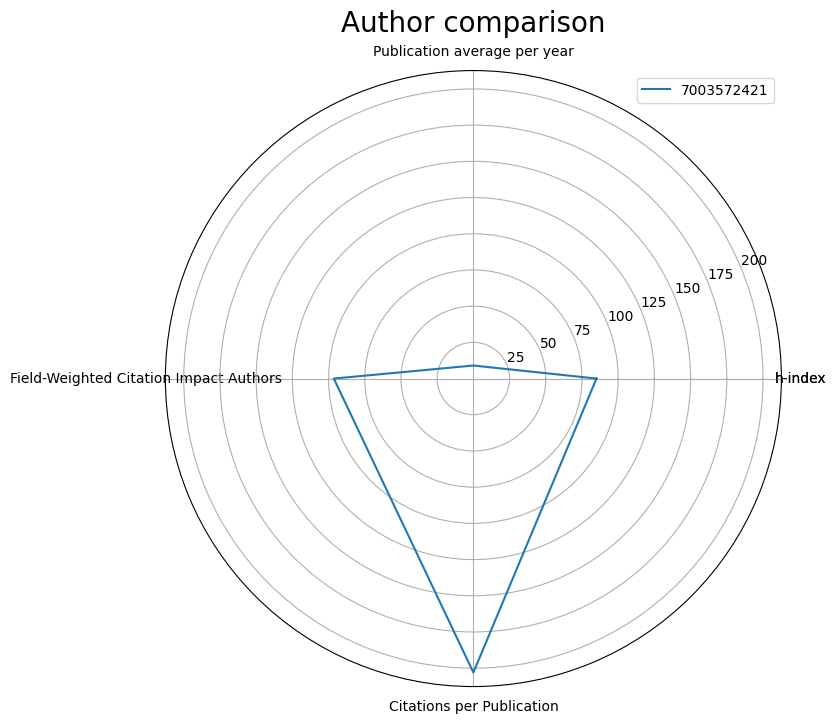

In [119]:
categories = np.array(['h-index', 'Publication average per year', 'Field-Weighted Citation Impact Authors', 'Citations per Publication'])
categories = [*categories, categories[0]]

a2 = rsdf.loc[1, categories].values

label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(a1))

plt.figure(figsize=(8, 8))
plt.subplot(polar=True)
plt.plot(label_loc, a2, label=rsdf.iloc[1,1])
plt.title('Author comparison', size=20, y = 1.05)
lines, labels = plt.thetagrids(np.degrees(label_loc), labels=categories)
plt.legend()
plt.show()